In [1]:
import pandas as pd
from scipy import stats
#from sklearn import preprocessing

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
flight_df = pd.read_csv("/Users/randalllionelkharkrang/Desktop/Innopolis/Semester1/Machine_learning/Assignment_1/flight_delay.csv",parse_dates=['Scheduled depature time','Scheduled arrival time'])

In [3]:
flight_df.head()

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0


In [4]:
flight_df.shape

(675513, 5)

In [5]:
flight_df.describe()

,Delay
count,675513.000000
mean,9.912939
std,44.895875
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,1436.000000


In [6]:
#flight_df.columns = [c.lower().replace(' ', '_') for c in flight_df.columns]
flight_df.shape

(675513, 5)

In [7]:
flight_df['Flight duration(minutes)'] = (abs(flight_df['Scheduled depature time'] - flight_df['Scheduled arrival time'])).dt.seconds/60
flight_df['Scheduled depature month'] = flight_df['Scheduled depature time'].dt.month
flight_df['Scheduled depature dow'] = flight_df['Scheduled depature time'].dt.day_name()
flight_df['Scheduled depature hour'] = flight_df['Scheduled depature time'].dt.hour
flight_df['Scheduled depature year'] = flight_df['Scheduled depature time'].dt.year

In [8]:
flight_df.head()

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,Flight duration(minutes),Scheduled depature month,Scheduled depature dow,Scheduled depature hour,Scheduled depature year
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0,785.0,10,Tuesday,7,2015
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0,645.0,10,Tuesday,9,2015
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0,770.0,10,Tuesday,10,2015
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0,770.0,10,Tuesday,12,2015
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,145.0,10,Tuesday,14,2015


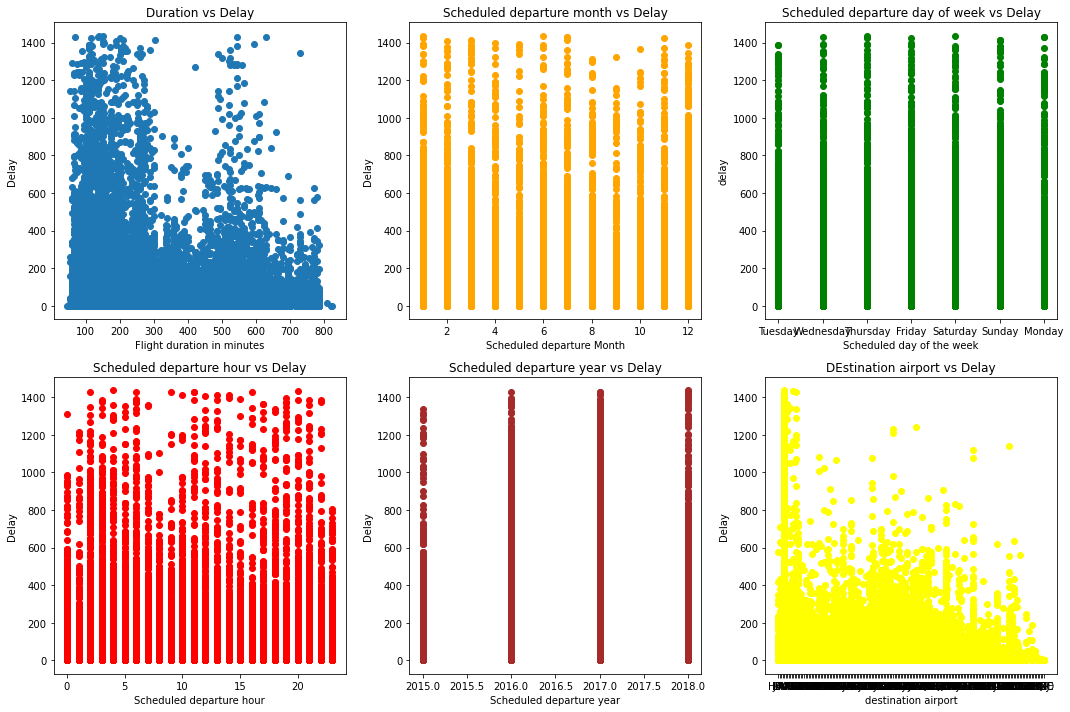

In [257]:
#flight_df.plot(x='Flight duration(minutes)', y='Delay', style='o')
#plt.title('Duration vs Delay')
#plt.xlabel('Duration')
#plt.ylabel('Delay')
#plt.show()
fig, axs = plt.subplots(2,3 ,figsize=(15,10))
axs[0, 0].scatter(flight_df['Flight duration(minutes)'], flight_df['Delay'])
axs[0, 0].set_title('Duration vs Delay')
axs[0, 0].set(xlabel ='Flight duration in minutes',ylabel='Delay')
axs[0, 1].scatter(flight_df['Scheduled depature month'], flight_df['Delay'], color='orange')
axs[0, 1].set_title('Scheduled departure month vs Delay')
axs[0, 1].set(xlabel ='Scheduled departure Month',ylabel='Delay')
axs[0, 2].scatter(flight_df['Scheduled depature dow'], flight_df['Delay'], color='green')
axs[0, 2].set_title('Scheduled departure day of week vs Delay')
axs[0, 2].set(xlabel ='Scheduled day of the week',ylabel='delay')
axs[1, 0].scatter(flight_df['Scheduled depature hour'], flight_df['Delay'], color='red')
axs[1, 0].set_title('Scheduled departure hour vs Delay')
axs[1, 0].set(xlabel ='Scheduled departure hour',ylabel='Delay')
axs[1, 1].scatter(flight_df['Scheduled depature year'], flight_df['Delay'], color='brown')
axs[1, 1].set_title('Scheduled departure year vs Delay')
axs[1, 1].set(xlabel ='Scheduled departure year',ylabel='Delay')
axs[1, 2].scatter(flight_df['Destination Airport'], flight_df['Delay'], color='yellow')
axs[1, 2].set_title('DEstination airport vs Delay')
axs[1, 2].set(xlabel ='destination airport',ylabel='Delay')
fig.tight_layout()

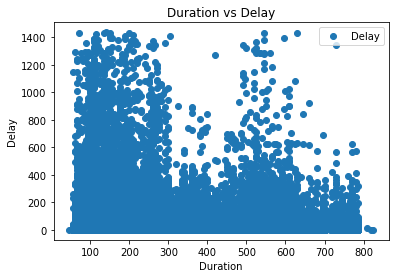

In [9]:
flight_df.plot(x='Flight duration(minutes)', y='Delay', style='o')
plt.title('Duration vs Delay')
plt.xlabel('Duration')
plt.ylabel('Delay')
plt.show()

Splitting the training and test data

In [259]:
X_train = flight_df.loc[(flight_df['Scheduled depature year'] >= 2015) & (flight_df['Scheduled depature year'] <=2017)]
X_test = flight_df.loc[flight_df['Scheduled depature year'] == 2018]
y_train = X_train['Delay']
y_test = X_test['Delay']
X_train = X_train['Flight duration(minutes)']
X_test = X_test['Flight duration(minutes)']

In [260]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

0
0


In [261]:
print(X_train.shape)
print(X_test.shape)

(499062,)
(176451,)


Outlier detection

In [262]:
df = pd.concat([X_train,y_train],axis=1)
df_mean, std_dev = np.mean(df['Flight duration(minutes)']), np.std(df['Flight duration(minutes)'])
cutoff = std_dev*3
lower,upper = df_mean - cutoff, df_mean + cutoff
# identify outliers
outliers = [x for x in df['Flight duration(minutes)'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
df.drop(df[df['Flight duration(minutes)'] < lower].index, inplace = True)
df.drop(df[df['Flight duration(minutes)'] > upper].index, inplace = True)
print('Non-outlier observations: %d' % len(df))

Identified outliers: 14359
Non-outlier observations: 484703


In [263]:
#seperate the data set again
X_train = df['Flight duration(minutes)']
y_train = df['Delay']
print(X_train.shape)
print(y_train.shape)

(484703,)
(484703,)


Simple linear regresssion

In [264]:
X_train = (X_train.to_numpy()).reshape(-1,1)
X_test = (X_test.to_numpy()).reshape(-1,1)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [268]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print(f"model intercept: {linreg.intercept_}")
print(f"model slope: {linreg.coef_}")

model intercept: 7.853417866020342
model slope: [0.01670644]


In [269]:
y_train_pred  = linreg.predict(X_train)
print('Mean Absolute Error training :', metrics.mean_absolute_error(y_train_pred, y_train))
print('Mean Squared Error training :', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error training :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 score training :', metrics.r2_score(y_train,y_train_pred))

Mean Absolute Error training : 15.25866212144142
Mean Squared Error training : 2143.64488975645
Root Mean Squared Error training : 46.29951284577895
R2 score training : 0.0012500638690523536


In [270]:
y_pred = linreg.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [271]:
print('Mean Absolute Error for test :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error for test :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error for test :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score  for test :', metrics.r2_score(y_test,y_pred))

Mean Absolute Error for test : 14.410128100731614
Mean Squared Error for test : 1619.3014771835187
Root Mean Squared Error for test : 40.24054518993895
R2 score  for test : -0.010313284654723587


Multiple Regression:

splitting the data based on multiple columns

In [9]:
X_test = flight_df.loc[flight_df['Scheduled depature year'] == 2018]
X_train = flight_df.loc[(flight_df['Scheduled depature year'] >= 2015) & (flight_df['Scheduled depature year'] <=2017)]
y_train = X_train['Delay']
y_test = X_test['Delay']
#X_test = X_test.drop(['Delay'],axis=1)
#X_test
#y_test

In [10]:
X_train = X_train.drop(['Scheduled depature time','Scheduled arrival time'],axis=1)
X_test = X_test.drop(['Scheduled depature time','Scheduled arrival time'],axis=1)


In [11]:
X_train.head()

,Depature Airport,Destination Airport,Delay,Flight duration(minutes),Scheduled depature month,Scheduled depature dow,Scheduled depature hour,Scheduled depature year
0,SVO,HAV,0.0,785.0,10,Tuesday,7,2015
1,SVO,JFK,2.0,645.0,10,Tuesday,9,2015
2,SVO,MIA,0.0,770.0,10,Tuesday,10,2015
3,SVO,LAX,0.0,770.0,10,Tuesday,12,2015
4,OTP,SVO,9.0,145.0,10,Tuesday,14,2015


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=123)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(436679, 8)
(436679,)
(62383, 8)
(62383,)


In [14]:
print("Number of missing values in train before encoding: ",x_train.isnull().sum().sum())
print("Number of missing values in test before encoding: ",X_test.isnull().sum().sum())
print("Number of missing values in train before encoding: ",x_val.isnull().sum().sum())

Number of missing values in train before encoding:  0
Number of missing values in test before encoding:  0
Number of missing values in train before encoding:  0


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()
feats = ['Depature Airport','Destination Airport','Scheduled depature dow']
encoder.fit(x_train[feats].stack().unique())
#print(encoder.categories_)

LabelEncoder()

In [17]:
x_train['Depature Airport']=encoder.transform(x_train['Depature Airport'])
x_train['Destination Airport']= encoder.transform(x_train['Destination Airport'])
x_train['Scheduled depature dow']= encoder.transform(x_train['Scheduled depature dow'])

<ipython-input-17-202d2c1618db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Depature Airport']=encoder.transform(x_train['Depature Airport'])
<ipython-input-17-202d2c1618db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Destination Airport']= encoder.transform(x_train['Destination Airport'])
<ipython-input-17-202d2c1618db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [18]:
x_train.shape

(436679, 8)

In [19]:
encoder_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [20]:
x_val['Depature Airport']=x_val['Depature Airport'].apply(lambda x: encoder_dict.get(x,-1))
x_val['Destination Airport']= x_val['Destination Airport'].apply(lambda x: encoder_dict.get(x,-1))
x_val['Scheduled depature dow']= x_val['Scheduled depature dow'].apply(lambda x: encoder_dict.get(x,-1))
X_test['Depature Airport']=X_test['Depature Airport'].apply(lambda x: encoder_dict.get(x,-1))
X_test['Destination Airport']= X_test['Destination Airport'].apply(lambda x: encoder_dict.get(x,-1))
X_test['Scheduled depature dow']= X_test['Scheduled depature dow'].apply(lambda x: encoder_dict.get(x,-1))

<ipython-input-20-45c77df3b635>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['Depature Airport']=x_val['Depature Airport'].apply(lambda x: encoder_dict.get(x,-1))
<ipython-input-20-45c77df3b635>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['Destination Airport']= x_val['Destination Airport'].apply(lambda x: encoder_dict.get(x,-1))
<ipython-input-20-45c77df3b635>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(436679, 8)
(436679,)
(62383, 8)
(62383,)
(176451, 8)
(176451,)


In [22]:
X_test

,Depature Airport,Destination Airport,Delay,Flight duration(minutes),Scheduled depature month,Scheduled depature dow,Scheduled depature hour,Scheduled depature year
499059,11,140,0.0,250.0,1,100,1,2018
499060,84,140,0.0,215.0,1,100,1,2018
499061,34,140,0.0,340.0,1,100,1,2018
499062,153,140,1.0,250.0,1,100,2,2018
499063,16,140,0.0,235.0,1,100,2,2018
...,...,...,...,...,...,...,...,...
675508,140,141,0.0,140.0,8,42,23,2018
675509,82,140,0.0,80.0,8,42,23,2018
675510,140,35,0.0,85.0,8,42,23,2018
675511,140,156,0.0,200.0,8,42,23,2018


imputing the data

In [23]:

print("Number of missing values in train after encoding: ",x_train.isnull().sum().sum())
print("Number of missing values in validation after encoding: ",x_val.isnull().sum().sum())
print("Number of missing values in Test after encoding: ",X_test.isnull().sum().sum())
#print("Number of missing values in test: ",count_nans(X_test))

Number of missing values in train after encoding:  0
Number of missing values in validation after encoding:  0
Number of missing values in Test after encoding:  0


In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train)
x_train = imputer.transform(x_train)
X_test = imputer.transform(X_test)
x_val = imputer.transform(x_val)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(436679, 8)
(436679,)
(176451, 8)
(176451,)
(62383, 8)
(62383,)


In [26]:
print("Number of missing values in train after imputing: ",np.sum(np.sum(np.isnan(x_train))))
print("Number of missing values in val after imputing: ",np.sum(np.sum(np.isnan(x_val))))

print("Number of missing values in test after imputing: ",np.sum(np.sum(np.isnan(X_test))))

Number of missing values in train after imputing:  0
Number of missing values in val after imputing:  0
Number of missing values in test after imputing:  0


In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(436679, 8)
(436679,)
(62383, 8)
(62383,)
(176451, 8)
(176451,)


In [28]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
X_test = scaler.transform(X_test)
x_val = scaler.transform(x_val)

In [29]:
from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(x_train)
# select all rows that are not outliers
mask = yhat != -1
x_train, y_train = x_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(x_train.shape, y_train.shape)

(430634, 8) (430634,)


Applying PCA to check variance of features

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=8)
#pca.fit(X_train)
x_reduced = pca.fit_transform(x_train)

In [32]:
print(pca.explained_variance_ratio_)

[0.22621131 0.19301668 0.17784572 0.14392531 0.13560261 0.0755823
 0.04661442 0.00120164]


Based on the method above, it seems that Ridge regression would do better

In [33]:
from sklearn.linear_model import  Ridge
regressor = Ridge()
regressor.fit(x_train, y_train)
print(f"Model coefficients : {regressor.coef_}")

Model coefficients : [-4.87127075e-03  1.79415148e-02  1.42487745e+03  4.34329029e-02
  3.47947758e-03 -3.82219501e-03  1.43254446e-02  9.18056403e-03]


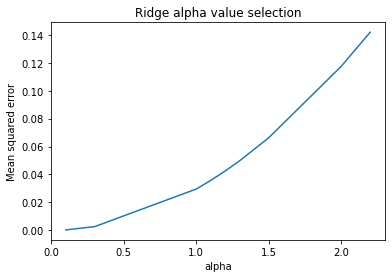

Best value of alpha: 0.1
MSE :  0.0002975570075433311


In [36]:
alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train,y_train)
    predict_val = ridge.predict(x_val)
    mse = metrics.mean_squared_error(y_val,predict_val)
    losses.append(mse)
    
plt.plot(alphas, losses)
plt.title("Ridge alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)
print("MSE : ", losses[np.argmin(losses)] )

In [37]:
regressor = Ridge(best_alpha)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error for ridge for test :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error ridge for test :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error for ridge for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score  for test :', metrics.r2_score(y_test,y_pred))

Mean Absolute Error for ridge for test : 0.005059115875465452
Mean Squared Error ridge for test : 0.00020875528578785936
Root Mean Squared Error for ridge for test: 0.0144483661978737
R2 score  for test : 0.9999998697535688


In [38]:
regressor = Ridge(best_alpha)
regressor.fit(x_train, y_train)
y_pred_train = regressor.predict(x_train)
print('Mean Absolute Error for ridge for train:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error ridge for train:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error for ridge for train:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('R2 score  for train :', metrics.r2_score(y_train,y_pred_train))

Mean Absolute Error for ridge for train: 0.004280891142530069
Mean Squared Error ridge for train: 0.00017059251185415174
Root Mean Squared Error for ridge for train: 0.013061106838784826
R2 score  for train : 0.9999998715283441


SVR trial 

In [39]:
from sklearn.svm import SVR

In [40]:
y_train.shape

(430634,)

In [65]:
x_train_sam = x_train[:1000,:]
x_val_sam = x_train[1001:1101,:]
y_val_sam = y_train[1001:1101]
x_test_sam = X_test[:400,:]
y_train_sam = y_train[:1000]
y_test_sam = y_test[:400]

In [66]:
gamma = [1,10,100]
C =[1,10,100]
svm_param ={}
for i in range(len(C)):
    res = []
    for j in range(len(gamma)):
        svm_model = SVR(kernel='linear',gamma=gamma[j],C=C[i])
        svm_model.fit(x_train_sam,y_train_sam)
        y_pred_svm = svm_model.predict(x_val_sam)
        mse = metrics.mean_absolute_error(y_val_sam, y_pred_svm)
        res.append((mse,gamma[j]))
    svm_param[C[i]] = res
print(svm_param)
#svm_model = SVR(kernel='rbf')
#svm_model.fit(x_train_sam,y_train_sam)

{1: [(8.50757907243132, 1), (8.50757907243132, 10), (8.50757907243132, 100)], 10: [(8.16153567349177, 1), (8.16153567349177, 10), (8.16153567349177, 100)], 100: [(4.9182025484144365, 1), (4.9182025484144365, 10), (4.9182025484144365, 100)]}


In [67]:
temp = [(k,min(v,key = lambda x : x[0])) for k,v in svm_param.items()]
res = min(temp,key= lambda x: x[1][0])
res
best_C, best_gamma = res[0],res[1][1]

In [68]:
svm = SVR(kernel='linear',C=best_C,gamma=best_gamma)
svm.fit(x_train_sam,y_train_sam)

SVR(C=100, gamma=1, kernel='linear')

In [69]:
y_pred_svm = svm.predict(x_test_sam)

In [70]:
print('Mean Absolute Error for SVR(linear) for test :', metrics.mean_absolute_error(y_test_sam, y_pred_svm))
print('Mean Squared Error for SVR(linear) for test :', metrics.mean_squared_error(y_test_sam, y_pred_svm))
print('Root Mean Squared Error for SVR(linear) for test:', np.sqrt(metrics.mean_squared_error(y_test_sam, y_pred_svm)))
print('R2 score for SVR(linear) for test :', metrics.r2_score(y_test_sam,y_pred_svm))

Mean Absolute Error for SVR(linear) for test : 3.9156449909116406
Mean Squared Error for SVR(linear) for test : 231.85471325122
Root Mean Squared Error for SVR(linear) for test: 15.226776193640596
R2 score for SVR(linear) for test : 0.6510244905895063


In [71]:
y_pred_svm_train = svm.predict(x_train_sam)

In [72]:
print('Mean Absolute Error for SVR(linear) for train :', metrics.mean_absolute_error(y_train_sam, y_pred_svm_train))
print('Mean Squared Error SVR(linear) for train :', metrics.mean_squared_error(y_train_sam, y_pred_svm_train))
print('Root Mean Squared Error for SVR(linear) for train:', np.sqrt(metrics.mean_squared_error(y_train_sam, y_pred_svm_train)))
print('R2 score for SVR(linear) for train :', metrics.r2_score(y_train_sam,y_pred_svm_train))

Mean Absolute Error for SVR(linear) for train : 4.990446734952451
Mean Squared Error SVR(linear) for train : 234.72421004795072
Root Mean Squared Error for SVR(linear) for train: 15.320711799650521
R2 score for SVR(linear) for train : 0.6380062186647127


polynomial Regression

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [14]:
X_train = flight_df.loc[(flight_df['Scheduled depature year'] >= 2015) & (flight_df['Scheduled depature year'] <=2017)]
X_test = flight_df.loc[flight_df['Scheduled depature year'] == 2018]
y_train = X_train['Delay']
y_test = X_test['Delay']
X_train = X_train['Flight duration(minutes)']
X_test = X_test['Flight duration(minutes)']

Outlier Detection

In [15]:
df = pd.concat([X_train,y_train],axis=1)
df_mean, std_dev = np.mean(df['Flight duration(minutes)']), np.std(df['Flight duration(minutes)'])
cutoff = std_dev*3
lower,upper = df_mean - cutoff, df_mean + cutoff
# identify outliers
outliers = [x for x in df['Flight duration(minutes)'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
df.drop(df[df['Flight duration(minutes)'] < lower].index, inplace = True)
df.drop(df[df['Flight duration(minutes)'] > upper].index, inplace = True)
print('Non-outlier observations: %d' % len(df))

Identified outliers: 14359
Non-outlier observations: 484703


In [16]:
#seperate the data set again
X_train = df['Flight duration(minutes)']
y_train = df['Delay']
print(X_train.shape)
print(y_train.shape)

(484703,)
(484703,)


In [17]:
X_train = (X_train.to_numpy()).reshape(-1,1)
X_test = (X_test.to_numpy()).reshape(-1,1)

In [18]:
X_train

array([[145.],
       [165.],
       [340.],
       ...,
       [ 75.],
       [ 85.],
       [270.]])

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(484703, 1)
(484703,)
(176451, 1)
(176451,)


5


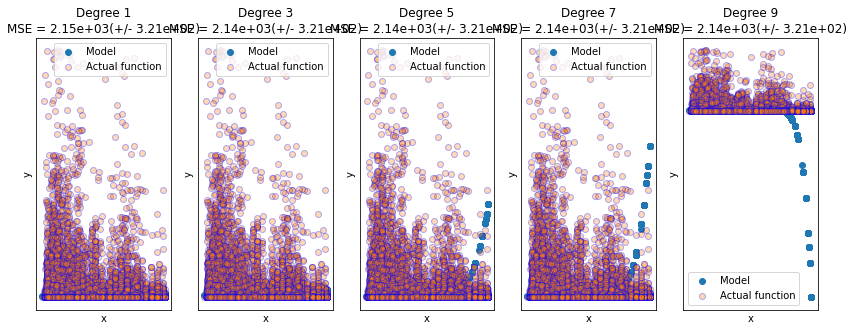

In [35]:
degrees = [1, 3, 5,7,9]
plt.figure(figsize=(14, 5))
losses = []
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=5)
    
    losses.append(-scores.mean())
    plt.scatter(X_test, pipeline.predict(X_test), label="Model")
    plt.scatter(X_test, y_test, edgecolor='b',label="Actual function",alpha=0.3)
    # plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    # plt.xlim((0, 1))
    # plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
best_deg = degrees[np.argmin(losses)]
print(best_deg)
plt.show()

In [36]:
# create a Linear Regressor   
lin_regressor = LinearRegression()

# pass the order of your polynomial here  
poly = PolynomialFeatures(degree = best_deg)

# convert to be used further to linear regression
X_transform = poly.fit_transform(X_train)

# fit this to Linear Regressor
lin_regressor.fit(X_transform,y_train) 

# get the predictions
X_test_transform = poly.fit_transform(X_test)
y_preds = lin_regressor.predict(X_test_transform)

In [37]:
from sklearn import metrics
print('Mean Absolute Error for polynomial regression for test :', metrics.mean_absolute_error(y_test, y_preds))
print('Mean Squared Error for polynomial test :', metrics.mean_squared_error(y_test, y_preds))
print('Root Mean Squared Error for polynomial regression for test:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
print('R2 score  for test :', metrics.r2_score(y_test,y_preds))

Mean Absolute Error for polynomial regression for test : 16.50360973989707
Mean Squared Error for polynomial test : 2220.4521252326895
Root Mean Squared Error for polynomial regression for test: 47.12167362512382
R2 score  for test : -0.38538271697516424


In [38]:
y_train_preds = lin_regressor.predict(X_transform)

In [39]:
print('Mean Absolute Error for polynomial regression for train :', metrics.mean_absolute_error(y_test, y_preds))
print('Mean Squared Error  for polynomial regression train :', metrics.mean_squared_error(y_test, y_preds))
print('Root Mean Squared Error for polynomial for train:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
print('R2 score for train :', metrics.r2_score(y_test,y_preds))

Mean Absolute Error for polynomial regression for train : 16.50360973989707
Mean Squared Error  for polynomial regression train : 2220.4521252326895
Root Mean Squared Error for polynomial for train: 47.12167362512382
R2 score for train : -0.38538271697516424
